In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

%matplotlib inline 

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (15,7)

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Harold\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
df = pd.read_pickle("merged_sanitized_strict")
dummies_col = list(df.columns[12:])

In [9]:
df.iloc[0]

quotation               councils and communities are passionate about ...
speaker                                                       Linda Scott
qids                                                 [Q19667145, Q469184]
date                                                  2020-03-01 16:30:28
numOccurrences                                                         45
                                              ...                        
wastewatermitigation                                                    0
anthropocene                                                            0
AR4                                                                     0
AR5                                                                     0
CO2                                                                     0
Name: 0, Length: 71, dtype: object

In [45]:
#df = pd.read_pickle("sanitized_strict_df")
#
## extracting polarity score
#df['compound'] = df.quotation.apply(lambda x: sia.polarity_scores(x)['compound'])
#
## building granualrity on the time to be able to extract trend
#
#df['year'] = df.date.dt.year
#df.year = df.year.astype("category")
#
#df['month'] = df.date.dt.month
#df.month = df.month.astype("category")
#
#df['year_month'] = df.date.dt.strftime('%y-%m')
#df.year_month = df.year_month.astype('category')
#
#df['year_month_day'] = df.date.dt.strftime('%y-%m-%d')
#df.year_month_day = df.year_month_day.astype('category')
#
#
#
## dummies is 1-hot encoding for specific climate change topics
#df_dummies = pd.read_pickle("sanitized_strict_dummies")
#df = df.merge(df_dummies)

#df.to_pickle("merged_sanitized_strict")



# All topics analysis

<AxesSubplot:xlabel='compound', ylabel='Count'>

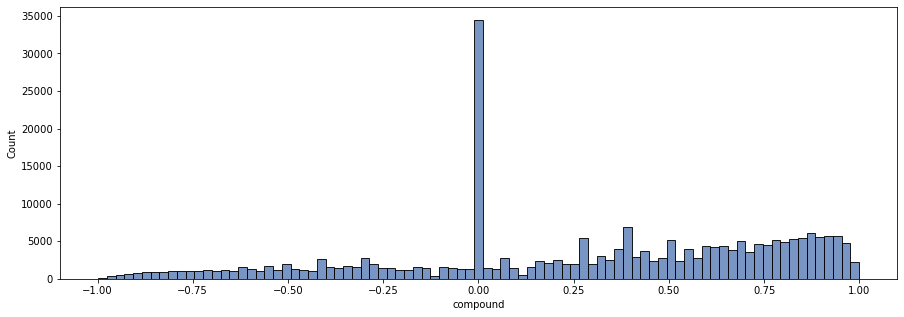

In [79]:
f,x = plt.subplots(1,1,figsize=(15,5))

sns.histplot(data=df, x='compound')

## Yearly observations

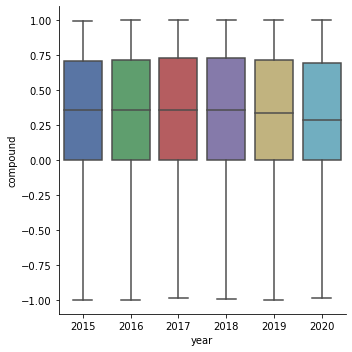

In [80]:
sns.catplot(x="year", y="compound", kind="box", data=df)

Text(0.5, 1.0, 'Average polarity score over the years')

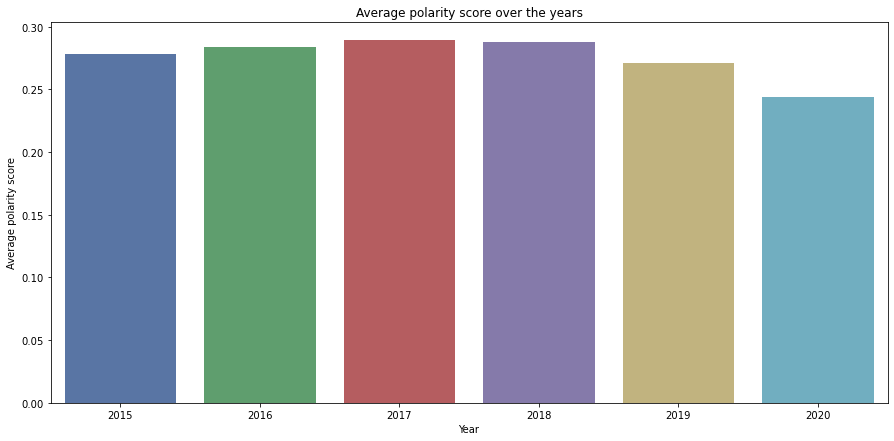

In [81]:
avg_scores = df.compound.groupby(by=df.year).mean()



g =sns.barplot(x=df.year.cat.categories, y=avg_scores)

g.set_xlabel("Year")
g.set_ylabel("Average polarity score")
g.set_title("Average polarity score over the years")

## Monthly category

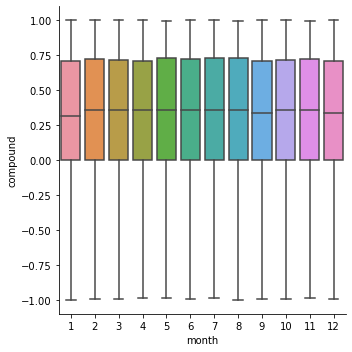

In [82]:
sns.catplot(x="month", y="compound", kind="box", data=df)

Text(0.5, 1.0, 'Average polarity score over the months')

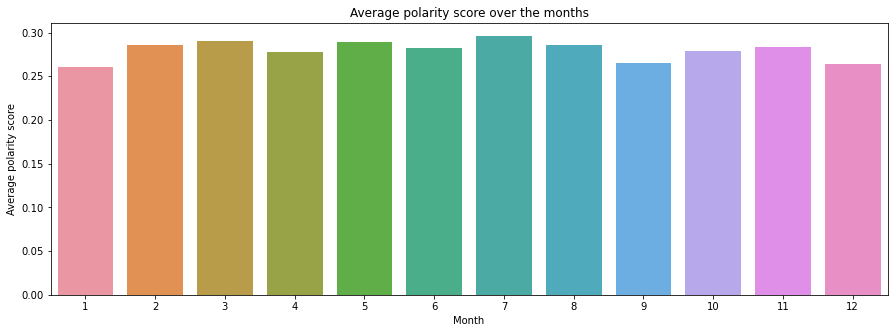

In [83]:
avg_scores = df.compound.groupby(by=df.month).mean()

f,x = plt.subplots(1,1,figsize=(15,5))

g =sns.barplot(x=df.month.cat.categories, y=avg_scores)

g.set_xlabel("Month")
g.set_ylabel("Average polarity score")
g.set_title("Average polarity score over the months")

## Yearly-monthly category

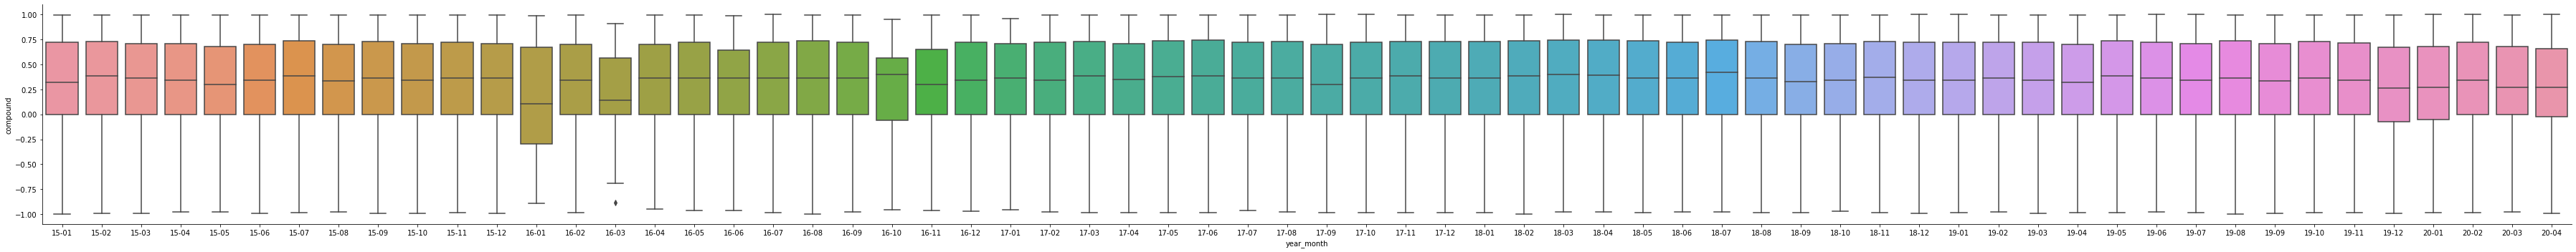

In [84]:
sns.catplot(x="year_month", y="compound", kind="box", data=df,height=5,aspect=10)

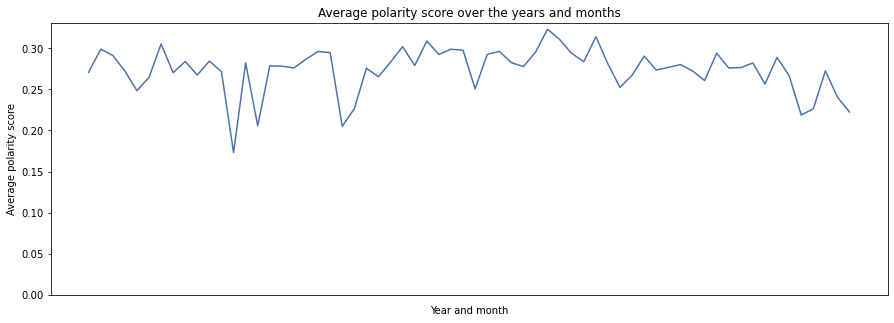

In [85]:
avg_scores = df.compound.groupby(by=df.year_month).mean()

f,x = plt.subplots(1,1,figsize=(15,5))

g =sns.lineplot(x=df.year_month.cat.categories, y=avg_scores)

g.set_xlabel("Year and month")
g.set_ylabel("Average polarity score")
g.set(xticklabels=[])
g.set_title("Average polarity score over the years and months")
g.set_ylim(0)
g.tick_params(bottom=False)

We notice a dip in November 2016

## Yearly-monthly-daily category

In [11]:
def plot_compound_year_month_day_time_series(df,filter=False):

    avg_scores = df.compound.groupby(by=df.year_month_day).mean()

    f,x = plt.subplots(1,1,figsize=(20,7))

    if filter:
        avg_scores = avg_scores[:]
        avg_scores[(avg_scores < avg_scores.quantile(0.95)) & (avg_scores > avg_scores.quantile(0.05))] = 0

    g =sns.lineplot(x=avg_scores.index, y=avg_scores)
    length = len(avg_scores)
    years= [2015,2016,2017,2018,2019,2020]
    step = length// len(years)
    ticks_labels= [years[i // step] if (i%step == 0 and i // step < 6) else "" for i in range(length)]

    g.set_xlabel("Year and month and day")
    g.set_ylabel("Average polarity score")
    g.set(xticklabels=ticks_labels)
    g.set_title("Average daily polarity score over the years")
    g.tick_params(bottom=False) 


C:\Users\Harold\AppData\Local\Temp/ipykernel_6660/134616466.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels=ticks_labels)


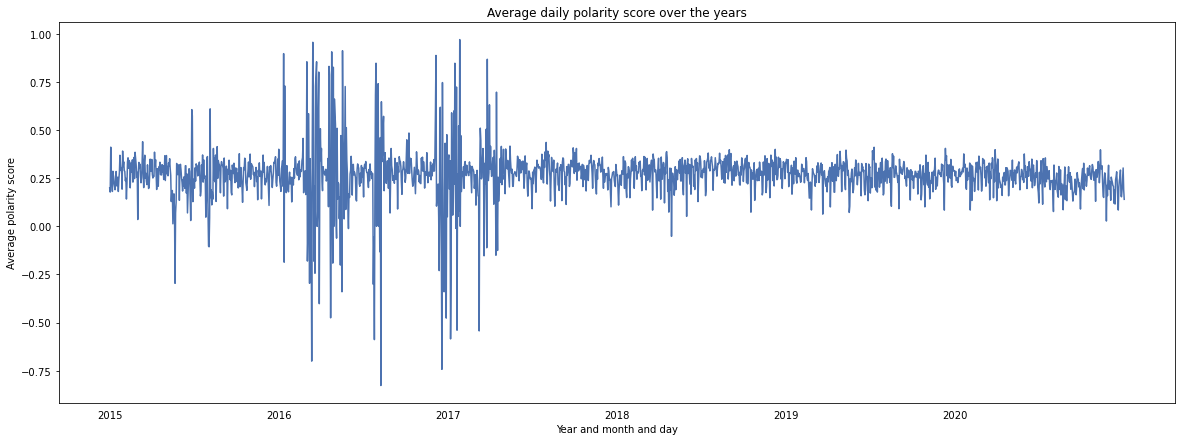

In [87]:
plot_compound_year_month_day_time_series(df)

Looking at this, it seems like that the narrative hasn't been increasingly polarized but it has know periods with very high polarity, let us investiage those time periods.

C:\Users\Harold\AppData\Local\Temp/ipykernel_6660/134616466.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels=ticks_labels)


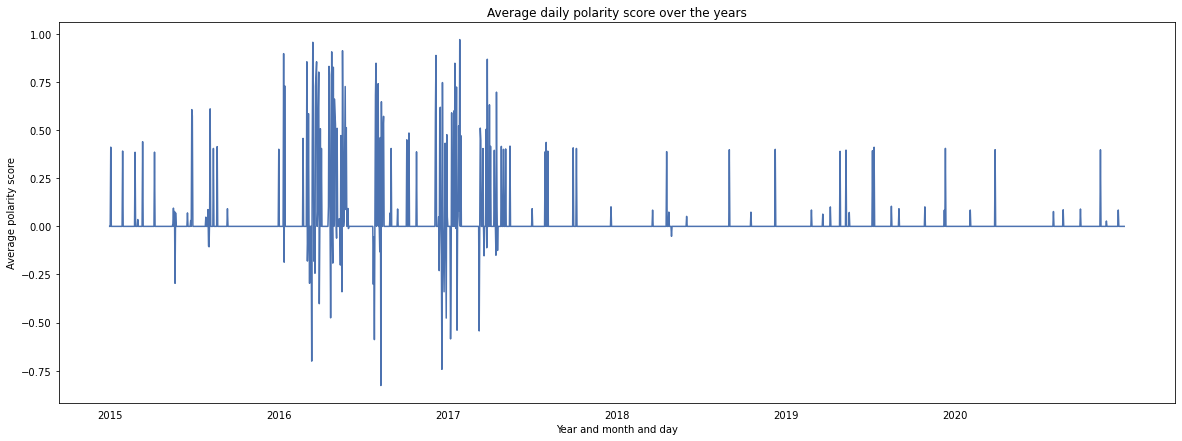

In [88]:
plot_compound_year_month_day_time_series(df,filter=True)

In [89]:
## finding the periods with the highest polarity scores

avg_scores = df.compound.groupby(by=df.year_month_day).mean()
sorted_scores = avg_scores.sort_values()

In [90]:
# let's find the top 5 periods of high polartiy in both directions

k = 5

for i in range(k):
    print(f"Date:{sorted_scores.index[i]} Polarity score: {sorted_scores[i]}\n")

for i in range(k):
    print(f"Date:{sorted_scores.index[-(i+1)]} Polarity score: {sorted_scores[-(i+1)]}\n")

Date:16-06-20 Polarity score: -0.8271

Date:16-10-16 Polarity score: -0.743

Date:16-01-20 Polarity score: -0.7003

Date:16-06-05 Polarity score: -0.58865

Date:16-11-04 Polarity score: -0.5849

Date:16-11-24 Polarity score: 0.9709

Date:16-01-22 Polarity score: 0.9568

Date:16-04-02 Polarity score: 0.913

Date:16-03-06 Polarity score: 0.9072

Date:15-11-20 Polarity score: 0.8979



It looks like 2016 is the period with the highest polarization around climate change. This could be linked with the 2016 USA Election which was highly polarized.

Let's investigate.

## Analysis on particular subjects

In [91]:
dummies_avg_year_month_day = df[dummies_col + ['compound']].groupby(by=df.year_month_day).mean()

In [92]:
sorted_dummies = dummies_avg_year_month_day.sort_values(by='compound')

Let's print the specific subjects that occur during highly polarized days

In [93]:
sorted_dummies.iloc[0,-1]

-0.8271

In [94]:
# let's find the top 5 periods of high polartiy in both directions

k = 7
offset = 0
negative_index = []
positive_index= []

print("Negative headlines\n")

for i in range(k):
    index = sorted_dummies[dummies_col].iloc[i+offset].argmax()
    subject = dummies_col[index]
    negative_index.append(sorted_dummies.index[i+offset])
    print(f"Date:{ sorted_dummies.index[i]}\tPolarity score: {sorted_dummies.iloc[i,-1]:.3f}\tSubject: {subject}\n")


print("Positive headlines\n")
for i in range(k):
    index = sorted_dummies[dummies_col].iloc[-(i+1+offset)].argmax()    
    subject = dummies_col[index]
    positive_index.append(sorted_dummies.index[-(i+1+offset)])
    print(f"Date: {sorted_dummies.index[-(i+1)]}\tPolarity score: {sorted_dummies.iloc[-(i+1),-1]:.3f}\tSubject: {subject}\n")

Negative headlines

Date:16-06-20	Polarity score: -0.827	Subject: climate

Date:16-10-16	Polarity score: -0.743	Subject: climate

Date:16-01-20	Polarity score: -0.700	Subject: fuel

Date:16-06-05	Polarity score: -0.589	Subject: climate

Date:16-11-04	Polarity score: -0.585	Subject: gas

Date:17-01-03	Polarity score: -0.543	Subject: recycling

Date:16-11-18	Polarity score: -0.540	Subject: carbon

Positive headlines

Date: 16-11-24	Polarity score: 0.971	Subject: climate

Date: 16-01-22	Polarity score: 0.957	Subject: carbon

Date: 16-04-02	Polarity score: 0.913	Subject: energy

Date: 16-03-06	Polarity score: 0.907	Subject: atmosphere

Date: 15-11-20	Polarity score: 0.898	Subject: earth

Date: 16-10-03	Polarity score: 0.888	Subject: sustainable

Date: 17-01-21	Polarity score: 0.869	Subject: sustainability



In [108]:

for date in negative_index:
    print(df[df.year_month_day == date].quotation.to_markdown())



|        | quotation                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|-------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 188873 | and the biggest challenge we re going to face in protecting this pl

In [96]:

for date in positive_index:
    print(df[df.year_month_day == date].quotation.to_markdown())

|        | quotation                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

## Exploration on given topics

In [31]:
topic_variances = []
topic_kurtosis = []

# looking to classify the variance and excess kurtosis of the daily polarity scores over 5 years for each topic
# we'll filter out topics that appear too little times (threshold at 100)

size_threshold = 500

for topic in dummies_col:
    new_df = df[df[topic] == 1]
    avg_scores = new_df.compound.groupby(by=new_df.year_month_day).mean()
    if not pd.isna(avg_scores.std()) and (len(new_df) > size_threshold):
        topic_variances.append((avg_scores.std(),topic, len(new_df)))
        topic_kurtosis.append((avg_scores.kurt(),topic, len(new_df)))

topic_kurtosis.sort(reverse=True)
topic_variances.sort(reverse=True)

In [20]:
def plot_compound_year__month_day_distribution(df):
    avg_scores = df.compound.groupby(by=df.year_month_day).mean()
    f,x = plt.subplots(1,1,figsize=(20,7))

    g = sns.histplot(x=avg_scores,bins="auto",kde=True)
    g.set_xlabel("Average daily polarity score")
    g.set_ylabel("Count")
    g.set_title("Distribution of average daily polarity score over the years")

### Comparison of polemic and non-polemic topics

We need to be able to decide whether a given topic is polemic/ controversial. Looking at the definition of **controversy** from Werriam-Webster: "a discussion marked especially by the expression of opposing views".

Therefore, a topic in which the daily polarity score always hovers around the same level, i.e its mean, would be considered not controversial. Whereas a topic where the daily polarity score tends to swing between -1 and 1, can be considered as a topic where there is expression of opposing views or that a given view is expressed in a variety of way (alarmist against hopeful).

Therefore, examining the empirical variance of the daily average polarity score of a given topic seems like a reasonable heuristic.

In [32]:
k = 10
polemic_topics = [tup[1] for tup in topic_variances[:k]]
not_polemic_topics = [tup[1] for tup in topic_variances[-k:]]

In [33]:
topic_variances

[(0.4831626943855666, 'wildfires', 936),
 (0.4810339101487981, 'deforestation', 568),
 (0.4658785862793069, 'ecosystem', 1358),
 (0.4558404411378285, 'ozone', 1610),
 (0.44323157795250107, 'nuclear', 2125),
 (0.4402040414468629, 'extinction', 1844),
 (0.4368566621522121, 'biomass', 590),
 (0.43562731378491915, 'biodiversity', 2324),
 (0.4275152912550589, 'coral', 1469),
 (0.42578968160860703, 'atmosphere', 1649),
 (0.4134232928541197, 'methane', 928),
 (0.40918707619479516, 'extinct', 2666),
 (0.39824681878080137, 'hurricane', 4365),
 (0.39285051154443423, 'glacier', 749),
 (0.3750301643627702, 'precipitation', 748),
 (0.36333110329054763, 'greenhouse', 2728),
 (0.3580289809503824, 'fossil', 3590),
 (0.3551650229868645, 'petrol', 4916),
 (0.35429095867574045, 'recycling', 4313),
 (0.3161455204344014, 'warming', 6275),
 (0.301263496830072, 'drought', 7771),
 (0.2851648689249553, 'resilience', 7663),
 (0.2783046172606876, 'coal', 10173),
 (0.275263991695311, 'footprint', 7409),
 (0.26140

In [28]:
df[df.atmosphere == 1].iloc[1].quotation

'this kind of starkly sectarian atmosphere may be suleimani s most lasting impact on the middle east to save his iranian empire in syria and lebanon he has helped fuel a sunni shiite conflict that threatens to engulf the region for years to come a war that he appears happy to wage '

In [29]:
not_polemic_topics

['agriculture',
 'emission',
 'fuel',
 'solar',
 'carbon',
 'earth',
 'climate',
 'gas',
 'sustainable',
 'energy']

In [101]:
def plot_multiple_topics(df,list_topics, polemic):
    
    k = len(list_topics)
    dim = [k//2 if k%2 == 0 else (k//2) + 1][0] 
    f, ax = plt.subplots(dim,2, figsize=(30,15) ,gridspec_kw={'wspace':0.2, 'hspace':1})
    s = "P" if polemic else "Not p"
    plt.suptitle(f"{s}olemic topics distributions")
    for i in range(k):
        new_df = df[df[list_topics[i]] == 1]
        avg_scores = new_df.compound.groupby(by=new_df.year_month_day).mean()
        j,l = divmod(i,2)
        g = sns.histplot(x=avg_scores,bins="auto",kde=True, ax= ax[j][l])
        g.set_xlabel("Average daily polarity score")
        g.set_ylabel("Count")
        g.set_title(f"{str.capitalize(list_topics[i])}")
        #g.set_title("Distribution of average daily polarity score over the years")

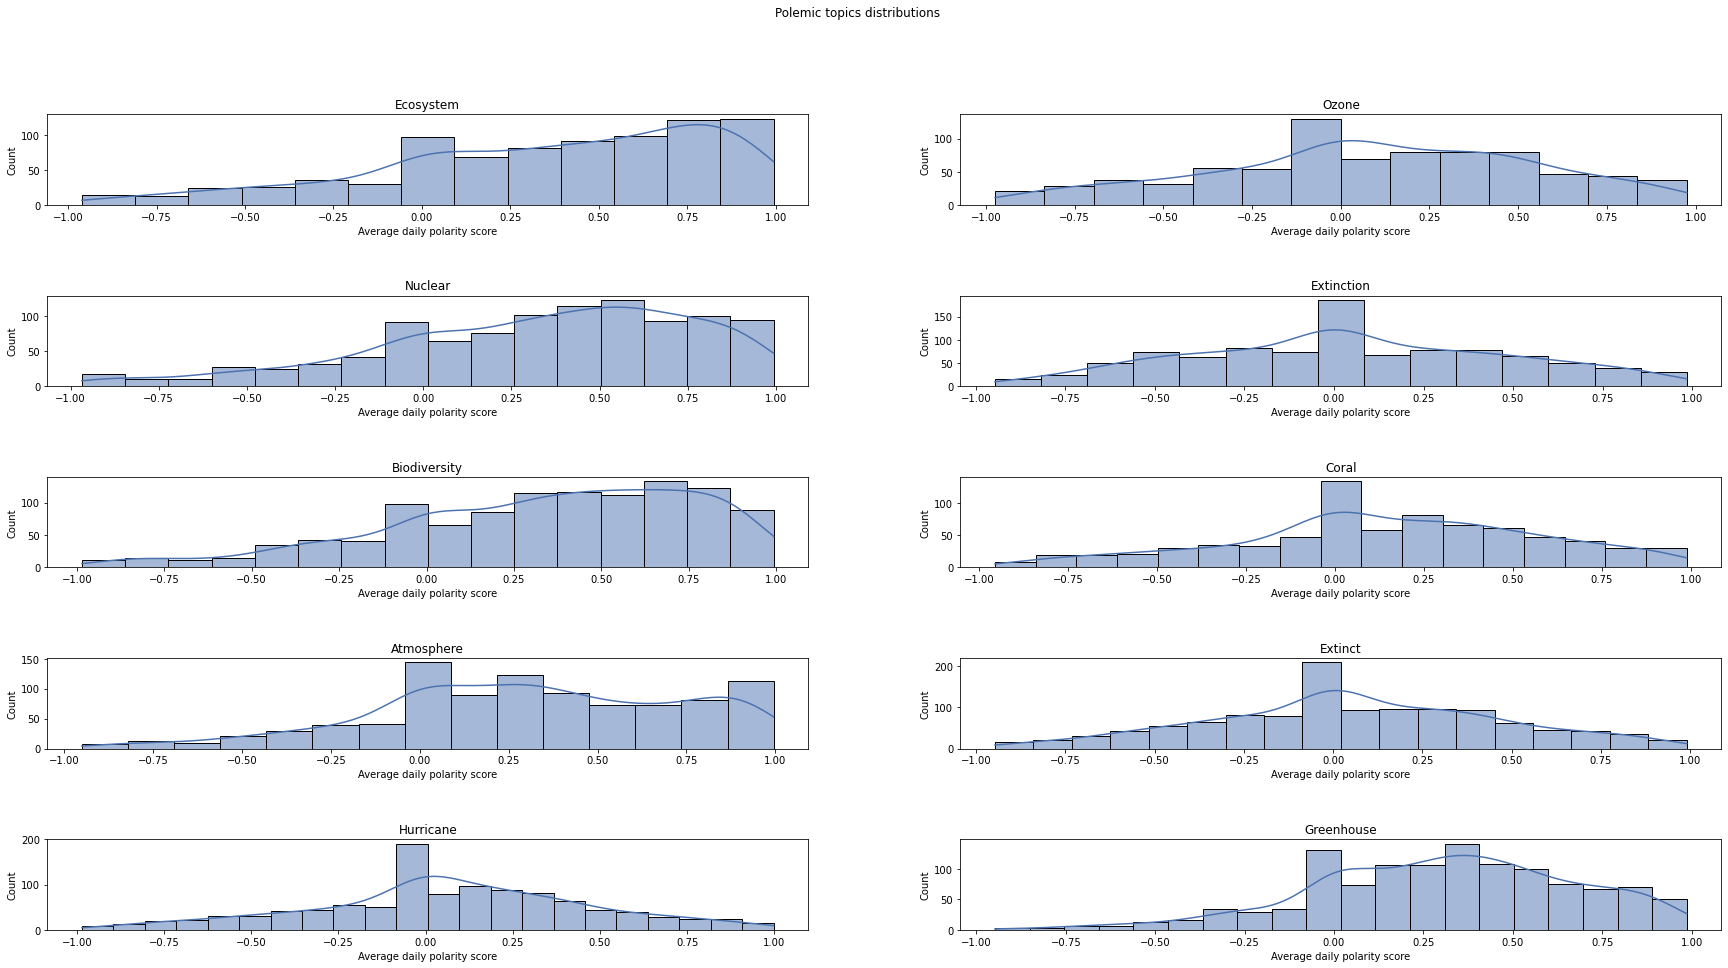

In [102]:
plot_multiple_topics(df,list_topics=polemic_topics,polemic=True)


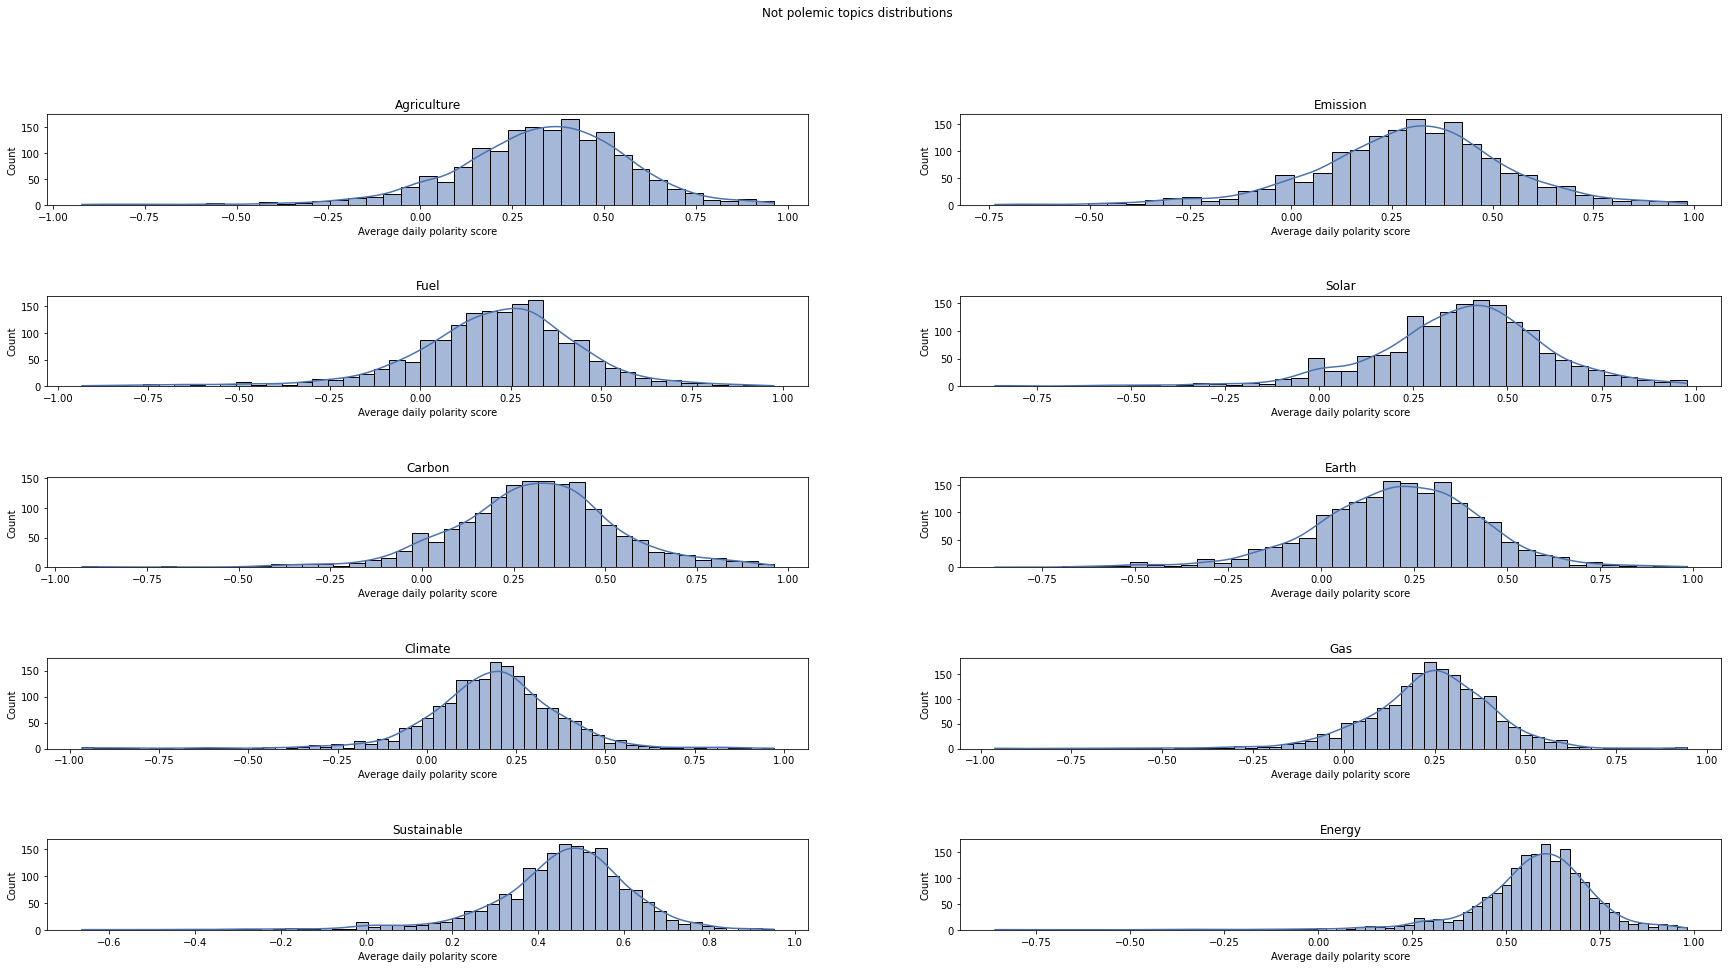

In [103]:
plot_multiple_topics(df,list_topics=not_polemic_topics,polemic=False)

C:\Users\Harold\AppData\Local\Temp/ipykernel_12248/134616466.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels=ticks_labels)


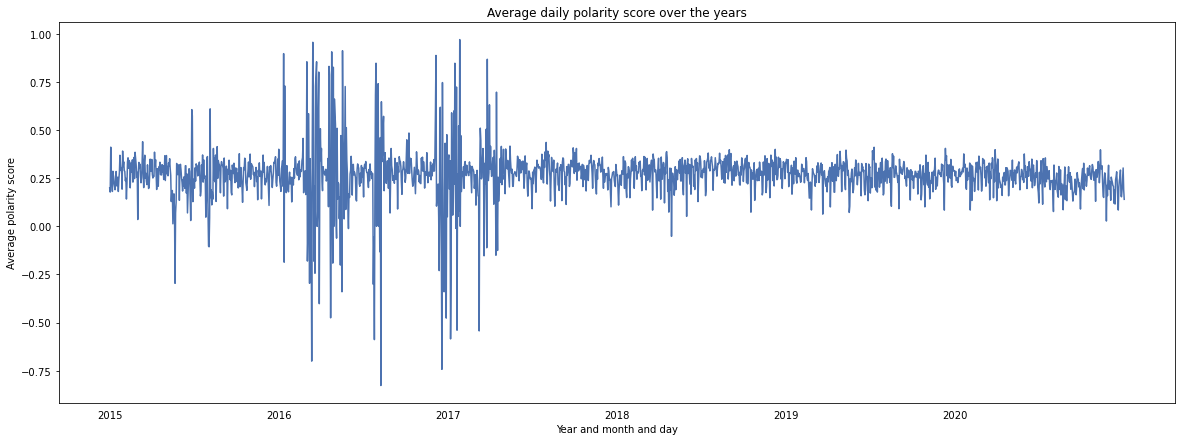

In [16]:
plot_compound_year_month_day_time_series(df)

C:\Users\Harold\AppData\Local\Temp/ipykernel_12248/134616466.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels=ticks_labels)


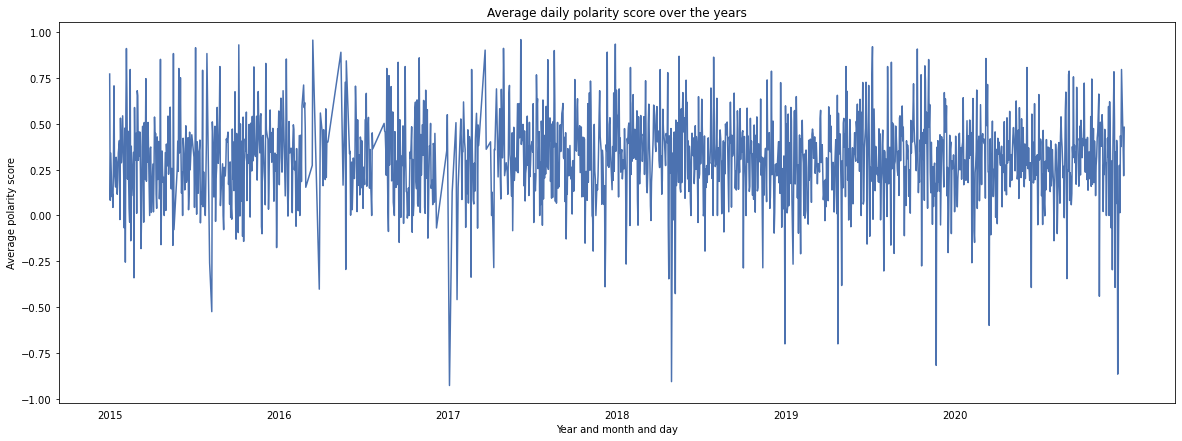

In [17]:
plot_compound_year_month_day_time_series(df[df.carbon == 1])